**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data files**

In [2]:
FOLDERS_ANT  = c(
    "annotation_enhancer_zscore_junke",
    "annotation_crispri_hcrff",
    "annotation_crispri_growth",
    "annotation_encode_e2g_benchmark",
    "annotation_encode_e2g_prediction",
    "annotation_enhancer_merge",
    "KS91_K562_ASTARRseq_peak_macs_input"
)

FOLDERS_LOOP = c(
    "hic_intact_ENCSR479XDG",
    "hic_intact_deep"
)

In [3]:
folder_reg = "hic_intact_deep"

for (folder_ant in FOLDERS_ANT){
    cat(folder_ant, "\n")
    fdiry  = file.path(FD_RES, "results", "region", folder_reg, folder_ant)
    fname  = "*.bed.gz"
    fglob  = file.path(fdiry, fname)
    fpaths = Sys.glob(fglob)
    fnames = basename(fpaths)
    print(fnames)
    cat("\n")
}

annotation_enhancer_zscore_junke 
 [1] "Loop_A.annotation.enhancer_zscore_junke.peak.ASTARR_AB.bed.gz"
 [2] "Loop_A.annotation.enhancer_zscore_junke.peak.ASTARR_A.bed.gz" 
 [3] "Loop_A.annotation.enhancer_zscore_junke.peak.ASTARR_R.bed.gz" 
 [4] "Loop_A.annotation.enhancer_zscore_junke.peak.LMPRA_AB.bed.gz" 
 [5] "Loop_A.annotation.enhancer_zscore_junke.peak.LMPRA_A.bed.gz"  
 [6] "Loop_A.annotation.enhancer_zscore_junke.peak.LMPRA_R.bed.gz"  
 [7] "Loop_A.annotation.enhancer_zscore_junke.peak.TMPRA_A.bed.gz"  
 [8] "Loop_A.annotation.enhancer_zscore_junke.peak.TMPRA_R.bed.gz"  
 [9] "Loop_A.annotation.enhancer_zscore_junke.peak.WSTARR_AB.bed.gz"
[10] "Loop_A.annotation.enhancer_zscore_junke.peak.WSTARR_A.bed.gz" 
[11] "Loop_A.annotation.enhancer_zscore_junke.peak.WSTARR_R.bed.gz" 
[12] "Loop_B.annotation.enhancer_zscore_junke.peak.ASTARR_AB.bed.gz"
[13] "Loop_B.annotation.enhancer_zscore_junke.peak.ASTARR_A.bed.gz" 
[14] "Loop_B.annotation.enhancer_zscore_junke.peak.ASTARR_R.bed.gz" 


**Helper function**

In [4]:
fun_format = function(txt){
    txt = format(txt, scientific = FALSE)
    txt = str_remove_all(txt, " ")
    return(txt)
}

fun_get_label = function(txt, patterns = c("Loop_A", "Loop_B")){
    idx = str_detect(string = txt, pattern = patterns)
    return(patterns[idx])
}

## Import data | Enhancer STARR/MPRA (Junke)

**Get files**

In [5]:
folder_reg = "hic_intact_deep"
folder_ant = "annotation_enhancer_zscore_junke"

cat(folder_ant, "\n")
fdiry  = file.path(FD_RES, "results", "region", folder_reg, folder_ant)
fname  = "*.bed.gz"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
fnames = basename(fpaths)
print(fnames)
cat("\n")

annotation = "Enhancer_ZScore"
labels     = fnames %>% 
    str_split(., "\\.") %>%
    do.call(rbind, .) %>%
    as.data.frame %>%
    dplyr::pull(5)

print(annotation)
print(labels)

annotation_enhancer_zscore_junke 
 [1] "Loop_A.annotation.enhancer_zscore_junke.peak.ASTARR_AB.bed.gz"
 [2] "Loop_A.annotation.enhancer_zscore_junke.peak.ASTARR_A.bed.gz" 
 [3] "Loop_A.annotation.enhancer_zscore_junke.peak.ASTARR_R.bed.gz" 
 [4] "Loop_A.annotation.enhancer_zscore_junke.peak.LMPRA_AB.bed.gz" 
 [5] "Loop_A.annotation.enhancer_zscore_junke.peak.LMPRA_A.bed.gz"  
 [6] "Loop_A.annotation.enhancer_zscore_junke.peak.LMPRA_R.bed.gz"  
 [7] "Loop_A.annotation.enhancer_zscore_junke.peak.TMPRA_A.bed.gz"  
 [8] "Loop_A.annotation.enhancer_zscore_junke.peak.TMPRA_R.bed.gz"  
 [9] "Loop_A.annotation.enhancer_zscore_junke.peak.WSTARR_AB.bed.gz"
[10] "Loop_A.annotation.enhancer_zscore_junke.peak.WSTARR_A.bed.gz" 
[11] "Loop_A.annotation.enhancer_zscore_junke.peak.WSTARR_R.bed.gz" 
[12] "Loop_B.annotation.enhancer_zscore_junke.peak.ASTARR_AB.bed.gz"
[13] "Loop_B.annotation.enhancer_zscore_junke.peak.ASTARR_A.bed.gz" 
[14] "Loop_B.annotation.enhancer_zscore_junke.peak.ASTARR_R.bed.gz" 


**Import data**

In [6]:
lst = lapply(seq_along(fpaths), function(idx){
    ### get file paths and labels
    fpath      = fpaths[idx]
    label_peak = labels[idx]
    label_loop = fun_get_label(fpath)
    
    ### read table
    dat = read_tsv(fpath, col_names = FALSE, show_col_types = FALSE)
    dat = dat %>% dplyr::select(
        head(names(.), 3),
        tail(names(.), 4))
    
    ### set column names
    cnames = c("Chrom", "Start", "End")
    cnames = c(
        paste(cnames, "Peak", sep = "_"),
        paste(cnames, "Loop", sep = "_"),
        "Distance"
    )
    colnames(dat) = cnames
    
    ### summarize info
    dat = dat %>% 
        dplyr::mutate(
            Peak = paste0(Chrom_Peak, ":", fun_format(Start_Peak), "-", fun_format(End_Peak)),
            Loop = paste0(Chrom_Loop, ":", fun_format(Start_Loop), "-", fun_format(End_Loop))
        ) %>%
        dplyr::mutate(
            Annotation = annotation,
            Label_Peak = label_peak,
            Label_Loop = label_loop
        ) %>%
        dplyr::select(Peak, Loop, Distance, Annotation, Label_Peak, Label_Loop)
    return(dat)
})

### combine tables
dat = bind_rows(lst)

### assign and show
dat_peak_starrmpra = dat
print(dim(dat))
head(dat)

[1] 689550      6


Peak,Loop,Distance,Annotation,Label_Peak,Label_Loop
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1:1013020-1013470,chr1:1000000-1010000,3021,Enhancer_ZScore,ASTARR_AB,Loop_A
chr1:1724540-1724700,chr1:1724000-1725000,0,Enhancer_ZScore,ASTARR_AB,Loop_A
chr1:2290700-2291030,chr1:2260000-2261000,29701,Enhancer_ZScore,ASTARR_AB,Loop_A
chr1:3313260-3313400,chr1:3349000-3350000,35601,Enhancer_ZScore,ASTARR_AB,Loop_A
chr1:5856530-5856630,chr1:5830000-5832000,24531,Enhancer_ZScore,ASTARR_AB,Loop_A
chr1:5917710-5917930,chr1:5915000-5920000,0,Enhancer_ZScore,ASTARR_AB,Loop_A


## Import data | annotation_crispri_hcrff 

**Get files**

In [7]:
folder_reg = "hic_intact_deep"
folder_ant = "annotation_crispri_hcrff"

cat(folder_ant, "\n")
fdiry  = file.path(FD_RES, "results", "region", folder_reg, folder_ant)
fname  = "*casa.merge.bed.gz"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
fnames = basename(fpaths)
print(fnames)
cat("\n")

annotation = "CRISPRi"
label      = "CRISPRi-HCRFF"

annotation_crispri_hcrff 
[1] "Loop_A.annotation.crispri_hcrff.casa.merge.bed.gz"
[2] "Loop_B.annotation.crispri_hcrff.casa.merge.bed.gz"



**Import data**

In [8]:
lst = lapply(seq_along(fpaths), function(idx){
    ### get file paths and labels
    fpath = fpaths[idx]
    label_peak = label
    label_loop = fun_get_label(fpath)
    
    ### read table
    dat = read_tsv(fpath, col_names = FALSE, show_col_types = FALSE)
    dat = dat %>% dplyr::select(
        head(names(.), 3),
        tail(names(.), 4))
    
    ### set column names
    cnames = c("Chrom", "Start", "End")
    cnames = c(
        paste(cnames, "Peak", sep = "_"),
        paste(cnames, "Loop", sep = "_"),
        "Distance"
    )
    colnames(dat) = cnames
    
    ### summarize info
    dat = dat %>% 
        dplyr::mutate(
            Peak = paste0(Chrom_Peak, ":", fun_format(Start_Peak), "-", fun_format(End_Peak)),
            Loop = paste0(Chrom_Loop, ":", fun_format(Start_Loop), "-", fun_format(End_Loop))
        ) %>%
        dplyr::mutate(
            Annotation = annotation,
            Label_Peak = label_peak,
            Label_Loop = label_loop
        ) %>%
        dplyr::select(Peak, Loop, Distance, Annotation, Label_Peak, Label_Loop)
    return(dat)
})

### combine tables
dat = bind_rows(lst)

### assign and show
dat_peak_crispri_hcrff = dat
print(dim(dat))
head(dat)

[1] 280   6


Peak,Loop,Distance,Annotation,Label_Peak,Label_Loop
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr11:5248847-5249047,chr11:5240000-5250000,0,CRISPRi,CRISPRi-HCRFF,Loop_A
chr11:5249847-5250847,chr11:5240000-5250000,0,CRISPRi,CRISPRi-HCRFF,Loop_A
chr11:5253147-5253547,chr11:5252000-5253000,148,CRISPRi,CRISPRi-HCRFF,Loop_A
chr11:5253647-5254647,chr11:5252000-5253000,648,CRISPRi,CRISPRi-HCRFF,Loop_A
chr11:5269147-5271147,chr11:5270000-5271000,0,CRISPRi,CRISPRi-HCRFF,Loop_A
chr11:5269147-5271147,chr11:5270000-5280000,0,CRISPRi,CRISPRi-HCRFF,Loop_A


## Import data | annotation_crispri_growth

**Get files**

In [9]:
folder_reg = "hic_intact_deep"
folder_ant = "annotation_crispri_growth"

cat(folder_ant, "\n")
fdiry  = file.path(FD_RES, "results", "region", folder_reg, folder_ant)
fname  = "*.active.bed.gz"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
fnames = basename(fpaths)
print(fnames)
cat("\n")

annotation = "CRISPRi"
label      = "CRISPRi-Growth"

annotation_crispri_growth 
[1] "Loop_A.annotation.crispri_growth.dhs.active.bed.gz"
[2] "Loop_B.annotation.crispri_growth.dhs.active.bed.gz"



**Import data**

In [10]:
lst = lapply(seq_along(fpaths), function(idx){
    ### get file paths and labels
    fpath = fpaths[idx]
    label_peak = label
    label_loop = fun_get_label(fpath)
    
    ### read table
    dat = read_tsv(fpath, col_names = FALSE, show_col_types = FALSE)
    dat = dat %>% dplyr::select(
        head(names(.), 3),
        tail(names(.), 4))
    
    ### set column names
    cnames = c("Chrom", "Start", "End")
    cnames = c(
        paste(cnames, "Peak", sep = "_"),
        paste(cnames, "Loop", sep = "_"),
        "Distance"
    )
    colnames(dat) = cnames
    
    ### summarize info
    dat = dat %>% 
        dplyr::mutate(
            Peak = paste0(Chrom_Peak, ":", fun_format(Start_Peak), "-", fun_format(End_Peak)),
            Loop = paste0(Chrom_Loop, ":", fun_format(Start_Loop), "-", fun_format(End_Loop))
        ) %>%
        dplyr::mutate(
            Annotation = annotation,
            Label_Peak = label_peak,
            Label_Loop = label_loop
        ) %>%
        dplyr::select(Peak, Loop, Distance, Annotation, Label_Peak, Label_Loop)
    return(dat)
})

### combine tables
dat = bind_rows(lst)

### assign and show
dat_peak_crispri_growth = dat
print(dim(dat))
head(dat)

[1] 17064     6


Peak,Loop,Distance,Annotation,Label_Peak,Label_Loop
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1:605550-605627,chr1:778000-779000,172374,CRISPRi,CRISPRi-Growth,Loop_A
chr1:826642-827902,chr1:868000-870000,40099,CRISPRi,CRISPRi-Growth,Loop_A
chr1:964946-965136,chr1:955000-960000,4947,CRISPRi,CRISPRi-Growth,Loop_A
chr1:964946-965136,chr1:958000-960000,4947,CRISPRi,CRISPRi-Growth,Loop_A
chr1:964946-965136,chr1:959000-960000,4947,CRISPRi,CRISPRi-Growth,Loop_A
chr1:995761-996190,chr1:1000000-1001000,3811,CRISPRi,CRISPRi-Growth,Loop_A


## Import data | annotation_encode_e2g_benchmark

**Get files**

In [11]:
folder_reg = "hic_intact_deep"
folder_ant = "annotation_encode_e2g_benchmark"

cat(folder_ant, "\n")
fdiry  = file.path(FD_RES, "results", "region", folder_reg, folder_ant)
fname  = "*.active.merge.bed.gz"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
fnames = basename(fpaths)
print(fnames)
cat("\n")

annotation = "ENCODE-E2G"
label      = "ENCODE-E2G_Benchmark"

annotation_encode_e2g_benchmark 
[1] "Loop_A.annotation.K562.EPCrisprBenchmark.active.merge.bed.gz"
[2] "Loop_B.annotation.K562.EPCrisprBenchmark.active.merge.bed.gz"



**Import data**

In [12]:
lst = lapply(seq_along(fpaths), function(idx){
    ### get file paths and labels
    fpath = fpaths[idx]
    label_peak = label
    label_loop = fun_get_label(fpath)
    
    ### read table
    dat = read_tsv(fpath, col_names = FALSE, show_col_types = FALSE)
    dat = dat %>% dplyr::select(
        head(names(.), 3),
        tail(names(.), 4))
    
    ### set column names
    cnames = c("Chrom", "Start", "End")
    cnames = c(
        paste(cnames, "Peak", sep = "_"),
        paste(cnames, "Loop", sep = "_"),
        "Distance"
    )
    colnames(dat) = cnames
    
    ### summarize info
    dat = dat %>% 
        dplyr::mutate(
            Peak = paste0(Chrom_Peak, ":", fun_format(Start_Peak), "-", fun_format(End_Peak)),
            Loop = paste0(Chrom_Loop, ":", fun_format(Start_Loop), "-", fun_format(End_Loop))
        ) %>%
        dplyr::mutate(
            Annotation = annotation,
            Label_Peak = label_peak,
            Label_Loop = label_loop
        ) %>%
        dplyr::select(Peak, Loop, Distance, Annotation, Label_Peak, Label_Loop)
    return(dat)
})

### combine tables
dat = bind_rows(lst)

### assign and show
dat_peak_encode_e2g_benchmark = dat
print(dim(dat))
head(dat)

[1] 1286    6


Peak,Loop,Distance,Annotation,Label_Peak,Label_Loop
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1:3774714-3775214,chr1:3770000-3775000,0,ENCODE-E2G,ENCODE-E2G_Benchmark,Loop_A
chr1:3774714-3775214,chr1:3770000-3780000,0,ENCODE-E2G,ENCODE-E2G_Benchmark,Loop_A
chr1:3774714-3775214,chr1:3775000-3776000,0,ENCODE-E2G,ENCODE-E2G_Benchmark,Loop_A
chr1:8858063-8858563,chr1:8858000-8859000,0,ENCODE-E2G,ENCODE-E2G_Benchmark,Loop_A
chr1:8858063-8858563,chr1:8858000-8860000,0,ENCODE-E2G,ENCODE-E2G_Benchmark,Loop_A
chr1:17441310-17441810,chr1:17440000-17445000,0,ENCODE-E2G,ENCODE-E2G_Benchmark,Loop_A


## Import data | annotation_encode_e2g_prediction

**Get files**

In [13]:
folder_reg = "hic_intact_deep"
folder_ant = "annotation_encode_e2g_prediction"

cat(folder_ant, "\n")
fdiry  = file.path(FD_RES, "results", "region", folder_reg, folder_ant)
fname  = "*.active.merge.bed.gz"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
fnames = basename(fpaths)
print(fnames)
cat("\n")

annotation = "ENCODE-E2G"
label      = "ENCODE-E2G_Prediction"

annotation_encode_e2g_prediction 
[1] "Loop_A.annotation.K562.ENCSR328LMT.ENCFF202FID.element_gene_links.active.merge.bed.gz"
[2] "Loop_B.annotation.K562.ENCSR328LMT.ENCFF202FID.element_gene_links.active.merge.bed.gz"



**Import data**

In [14]:
lst = lapply(seq_along(fpaths), function(idx){
    ### get file paths and labels
    fpath = fpaths[idx]
    label_peak = label
    label_loop = fun_get_label(fpath)
    
    ### read table
    dat = read_tsv(fpath, col_names = FALSE, show_col_types = FALSE)
    dat = dat %>% dplyr::select(
        head(names(.), 3),
        tail(names(.), 4))
    
    ### set column names
    cnames = c("Chrom", "Start", "End")
    cnames = c(
        paste(cnames, "Peak", sep = "_"),
        paste(cnames, "Loop", sep = "_"),
        "Distance"
    )
    colnames(dat) = cnames
    
    ### summarize info
    dat = dat %>% 
        dplyr::mutate(
            Peak = paste0(Chrom_Peak, ":", fun_format(Start_Peak), "-", fun_format(End_Peak)),
            Loop = paste0(Chrom_Loop, ":", fun_format(Start_Loop), "-", fun_format(End_Loop))
        ) %>%
        dplyr::mutate(
            Annotation = annotation,
            Label_Peak = label_peak,
            Label_Loop = label_loop
        ) %>%
        dplyr::select(Peak, Loop, Distance, Annotation, Label_Peak, Label_Loop)
    return(dat)
})

### combine tables
dat = bind_rows(lst)

### assign and show
dat_peak_encode_e2g_prediction = dat
print(dim(dat))
head(dat)

[1] 146733      6


Peak,Loop,Distance,Annotation,Label_Peak,Label_Loop
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1:115484-115984,chr1:778000-779000,662017,ENCODE-E2G,ENCODE-E2G_Prediction,Loop_A
chr1:628759-629259,chr1:778000-779000,148742,ENCODE-E2G,ENCODE-E2G_Prediction,Loop_A
chr1:629372-629872,chr1:778000-779000,148129,ENCODE-E2G,ENCODE-E2G_Prediction,Loop_A
chr1:632439-632939,chr1:778000-779000,145062,ENCODE-E2G,ENCODE-E2G_Prediction,Loop_A
chr1:633766-634583,chr1:778000-779000,143418,ENCODE-E2G,ENCODE-E2G_Prediction,Loop_A
chr1:778438-779143,chr1:778000-779000,0,ENCODE-E2G,ENCODE-E2G_Prediction,Loop_A


## Import data | ATAC

**Get files**

In [15]:
folder_reg = "hic_intact_deep"
folder_ant = "KS91_K562_ASTARRseq_peak_macs_input"

cat(folder_ant, "\n")
fdiry  = file.path(FD_RES, "results", "region", folder_reg, folder_ant)
fname  = "*.bed.gz"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
fnames = basename(fpaths)
print(fnames)
cat("\n")

annotation = "ATAC"
label      = "ATAC"

KS91_K562_ASTARRseq_peak_macs_input 
[1] "Loop_A.annotation.KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz"
[2] "Loop_B.annotation.KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz"



**Import data**

In [16]:
lst = lapply(seq_along(fpaths), function(idx){
    ### get file paths and labels
    fpath = fpaths[idx]
    label_peak = label
    label_loop = fun_get_label(fpath)
    
    ### read table
    dat = read_tsv(fpath, col_names = FALSE, show_col_types = FALSE)
    dat = dat %>% dplyr::select(
        head(names(.), 3),
        tail(names(.), 4))
    
    ### set column names
    cnames = c("Chrom", "Start", "End")
    cnames = c(
        paste(cnames, "Peak", sep = "_"),
        paste(cnames, "Loop", sep = "_"),
        "Distance"
    )
    colnames(dat) = cnames
    
    ### summarize info
    dat = dat %>% 
        dplyr::mutate(
            Peak = paste0(Chrom_Peak, ":", fun_format(Start_Peak), "-", fun_format(End_Peak)),
            Loop = paste0(Chrom_Loop, ":", fun_format(Start_Loop), "-", fun_format(End_Loop))
        ) %>%
        dplyr::mutate(
            Annotation = annotation,
            Label_Peak = label_peak,
            Label_Loop = label_loop
        ) %>%
        dplyr::select(Peak, Loop, Distance, Annotation, Label_Peak, Label_Loop)
    return(dat)
})

### combine tables
dat = bind_rows(lst)

### assign and show
dat_peak_atac = dat
print(dim(dat))
head(dat)

[1] 569206      6


Peak,Loop,Distance,Annotation,Label_Peak,Label_Loop
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1:10015-10442,chr1:778000-779000,767559,ATAC,ATAC,Loop_A
chr1:14253-14645,chr1:778000-779000,763356,ATAC,ATAC,Loop_A
chr1:16015-16477,chr1:778000-779000,761524,ATAC,ATAC,Loop_A
chr1:17237-17772,chr1:778000-779000,760229,ATAC,ATAC,Loop_A
chr1:28903-29613,chr1:778000-779000,748388,ATAC,ATAC,Loop_A
chr1:30803-31072,chr1:778000-779000,746929,ATAC,ATAC,Loop_A


## Save results

In [17]:
lst_dat_peak = list(
    dat_peak_starrmpra,
    dat_peak_crispri_hcrff,
    dat_peak_crispri_growth,
    dat_peak_encode_e2g_benchmark,
    dat_peak_encode_e2g_prediction,
    dat_peak_atac
)

vec_txt_fname = c(
    "peak.summary.enhancer_zscore_junke.concat.tsv",
    "peak.summary.crispri_hcrff.casa.merge.tsv",
    "peak.summary.crispri_growth.dhs.active.tsv",
    "peak.summary.encode_e2g_benchmark.active.merge.tsv",
    "peak.summary.encode_e2g_prediction.active.merge.tsv",
    "peak.summary.KS91_K562_ASTARRseq_peak_macs_input.tsv"
)

print(length(lst_dat_peak))
print(length(vec_txt_fname))

[1] 6
[1] 6


In [31]:
fdiry = file.path(FD_RES, "results", "region", "hic_intact_deep", "summary")

for (idx in seq_along(lst_dat_peak)){
    ### get table and file name
    dat   = lst_dat_peak[[idx]]
    fname = vec_txt_fname[idx]
    
    ### double check the results
    cat("Peak annotation and label:", "\n")
    cat("*", unique(dat$Annotation),  "\n")
    cat("*", unique(dat$Label_Peak),  "\n")
    cat("\n")
    cat("File name:", "\n")
    cat("*", fname,   "\n")
    cat("\n")
    
    ### write table
    fpath = file.path(fdiry, fname)
    write_tsv(dat, fpath)
}

Peak annotation and label: 
* Enhancer_ZScore 
* ASTARR_AB ASTARR_A ASTARR_R LMPRA_AB LMPRA_A LMPRA_R TMPRA_A TMPRA_R WSTARR_AB WSTARR_A WSTARR_R 

File name: 
* peak.summary.enhancer_zscore_junke.concat.tsv 

Peak annotation and label: 
* CRISPRi 
* CRISPRi-HCRFF 

File name: 
* peak.summary.crispri_hcrff.casa.merge.tsv 

Peak annotation and label: 
* CRISPRi 
* CRISPRi-Growth 

File name: 
* peak.summary.crispri_growth.dhs.active.tsv 

Peak annotation and label: 
* ENCODE-E2G 
* ENCODE-E2G_Benchmark 

File name: 
* peak.summary.encode_e2g_benchmark.active.merge.tsv 

Peak annotation and label: 
* ENCODE-E2G 
* ENCODE-E2G_Prediction 

File name: 
* peak.summary.encode_e2g_prediction.active.merge.tsv 

Peak annotation and label: 
* ATAC 
* ATAC 

File name: 
* peak.summary.KS91_K562_ASTARRseq_peak_macs_input.tsv 



## Combine

In [35]:
lst = list(
    dat_peak_starrmpra_active,
    dat_peak_crispri_hcrff,
    dat_peak_crispri_growth,
    dat_peak_encode_e2g_benchmark,
    dat_peak_encode_e2g_prediction,
    dat_peak_atac
)

dat = bind_rows(lst)

dat_peak_combine = dat
print(dim(dat))
head(dat)

[1] 426565      4


Peak,Annotation,Label,Distance
<chr>,<chr>,<chr>,<dbl>
chr10:100009910-100010030,Enhancer_ZScore,WSTARR_A,0
chr10:100028090-100028450,Enhancer_ZScore,WSTARR_A,11551
chr10:100065350-100065450,Enhancer_ZScore,WSTARR_A,15351
chr10:100084860-100085030,Enhancer_ZScore,WSTARR_A,14971
chr10:100151850-100152350,Enhancer_ZScore,WSTARR_A,32651
chr10:100185810-100186310,Enhancer_ZScore,WSTARR_A,0


In [49]:
dat = dat_peak_combine
lst = split(dat, dat$Label)
lst = lapply(lst, function(dat){
    ###
    vec_txt_peak   = unique(dat$Peak)
    num_peak_total = length(vec_txt_peak)
    
    ###
    dat = dat %>% dplyr::filter(Distance == 0)
    vec_txt_peak    = unique(dat$Peak)
    num_peak_looped = length(vec_txt_peak)
    
    ###
    res = list(num_peak_looped, num_peak_total, num_peak_looped/num_peak_total)
    names(res) = c("Count", "Total", "Freq")
    return(res)
})

###
dat = bind_rows(lst, .id = "Assay")
dat = dat %>% 
    dplyr::mutate(
        Count_Label = ifelse(
            Total > 1000, 
            paste0(round(Total / 1000), "K"),
            Total
        )
    ) %>%
    dplyr::mutate(
        Assay_Label = paste0(Assay, "\n(", Count_Label, ")")
    )

dat_peak_isLoop = dat
dat

Assay,Count,Total,Freq,Count_Label,Assay_Label
<chr>,<int>,<int>,<dbl>,<chr>,<chr>
ASTARR_A,6106,9368,0.6517933,9K,ASTARR_A (9K)
ATAC,65084,230509,0.2823491,231K,ATAC (231K)
CRISPRi-Growth,3183,6242,0.5099327,6K,CRISPRi-Growth (6K)
CRISPRi-HCRFF,55,80,0.6875000,80,CRISPRi-HCRFF (80)
ENCODE-E2G_Benchmark,342,409,0.8361858,409,ENCODE-E2G_Benchmark (409)
ENCODE-E2G_Prediction,32449,51829,0.6260781,52K,ENCODE-E2G_Prediction (52K)
LMPRA_A,21085,40096,0.5258629,40K,LMPRA_A (40K)
TMPRA_A,1391,8294,0.1677116,8K,TMPRA_A (8K)
WSTARR_A,22816,79738,0.2861371,80K,WSTARR_A (80K)


## Bar plot

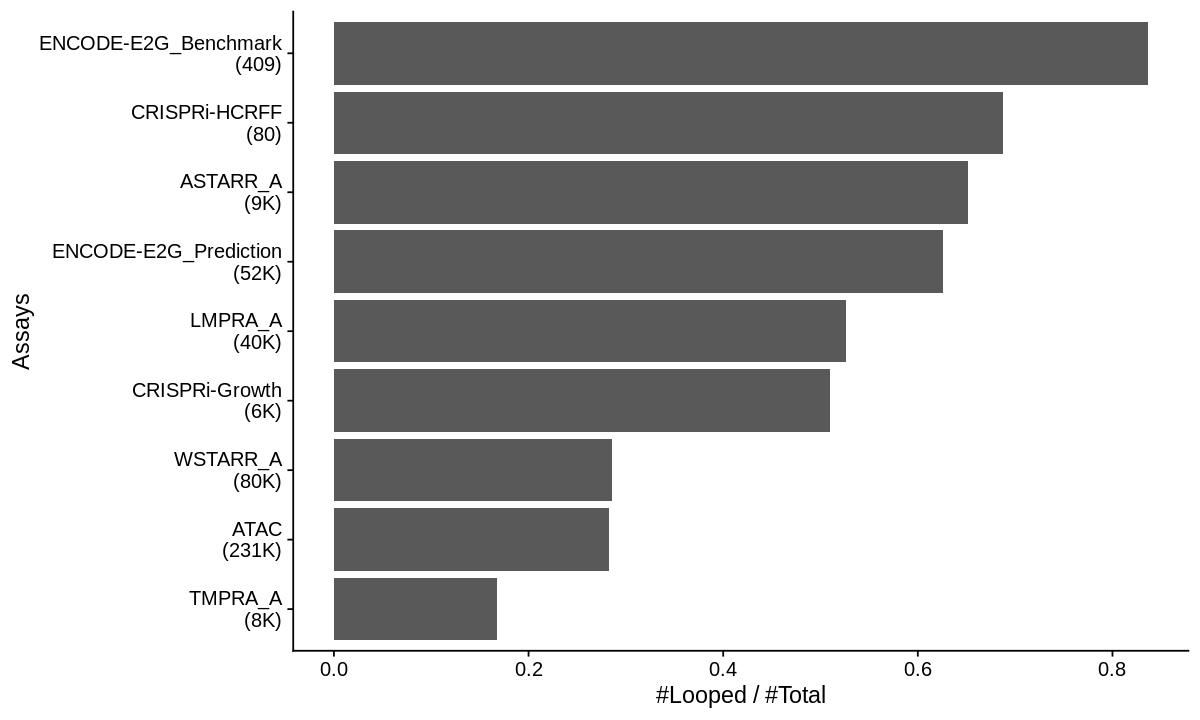

In [50]:
dat = dat_peak_isLoop
dat = dat %>% 
    dplyr::arrange(Freq) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x=Freq, y=Assay_Label)) + 
    geom_col() + 
    labs(x="#Looped / #Total", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

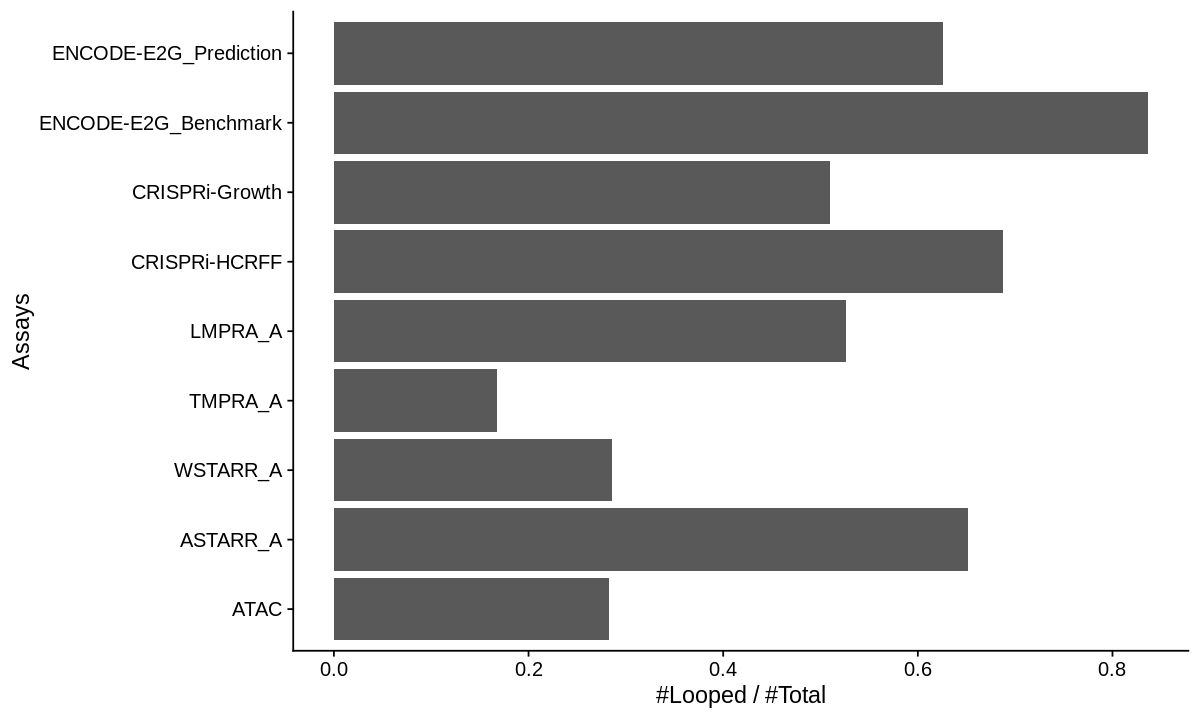

In [91]:
dat = dat_peak_isLoop
vec = c(
    "ATAC", 
    "ASTARR_A",
    "WSTARR_A",
    "TMPRA_A",
    "LMPRA_A",
    "CRISPRi-HCRFF",
    "CRISPRi-Growth",
    "ENCODE-E2G_Benchmark",
    "ENCODE-E2G_Prediction"
)
dat = dat %>% 
    dplyr::mutate( Assay = factor(Assay, levels=vec)) %>%
    dplyr::arrange(Assay) %>%
    dplyr::mutate( Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x=Freq, y=Assay)) + 
    geom_col() + 
    labs(x="#Looped / #Total", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

In [92]:
fname = "figure_enhancer_loop_overlap.pdf"
save_plot(fname, gpt)

## Plot distance

In [82]:
fun = function(vec){
    num = length(vec)
    num = round(num * 0.9)
    
    vec = sample(vec, size = num)
    res = mean(vec)
    return(res)
}

dat = dat_peak_combine
dat = dat %>% dplyr::filter(Distance < 10^6)

lst = split(dat$Distance, dat$Label)
lst = lapply(lst, function(vec){
    res = replicate(n=1000, fun(vec))
    return(res)
})

lst = lapply(lst, function(vec){
    vec = vec / 1000
    res = quantile(vec, probs = c(0.25, 0.5, 0.75))
    names(res) = c("Q1", "Q2", "Q3")
    return(res)
})

dat = bind_rows(lst, .id="Assay")

dat_peak_dist2Loop = dat
dat

Assay,Q1,Q2,Q3
<chr>,<dbl>,<dbl>,<dbl>
ASTARR_A,5.4556860,5.5076569,5.5588780
ATAC,11.9186304,11.9329645,11.9459916
CRISPRi-Growth,6.1906311,6.2703421,6.3390595
CRISPRi-HCRFF,0.8088090,0.8671597,0.9066111
ENCODE-E2G_Benchmark,0.7572154,0.8036182,0.8307283
ENCODE-E2G_Prediction,3.3083406,3.3242277,3.3386453
LMPRA_A,7.9556888,7.9822899,8.0118149
TMPRA_A,23.1336187,23.2601342,23.3748121
WSTARR_A,18.9097422,18.9467318,18.9778415


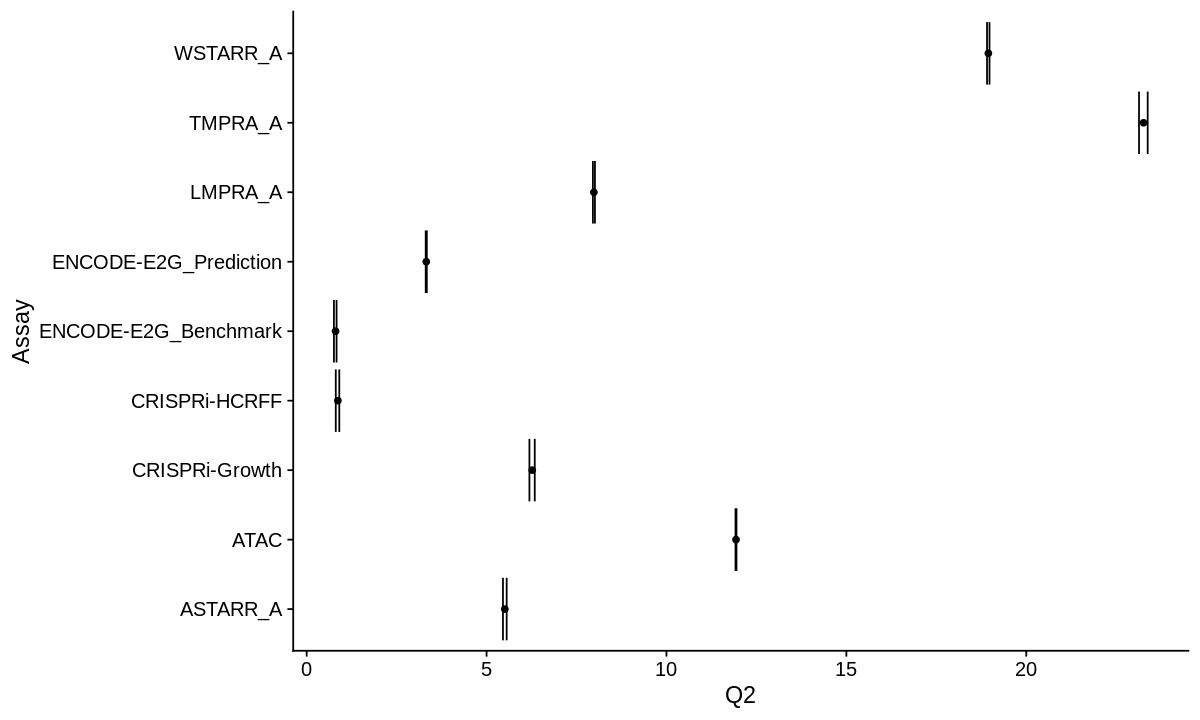

In [84]:
dat = dat_peak_dist2Loop

gpt = ggplot(dat, aes(x=Q2, y=Assay)) + 
    geom_point() +
    geom_errorbar(aes(xmin=Q1, xmax=Q3)) +
    theme_cowplot()

print(gpt)

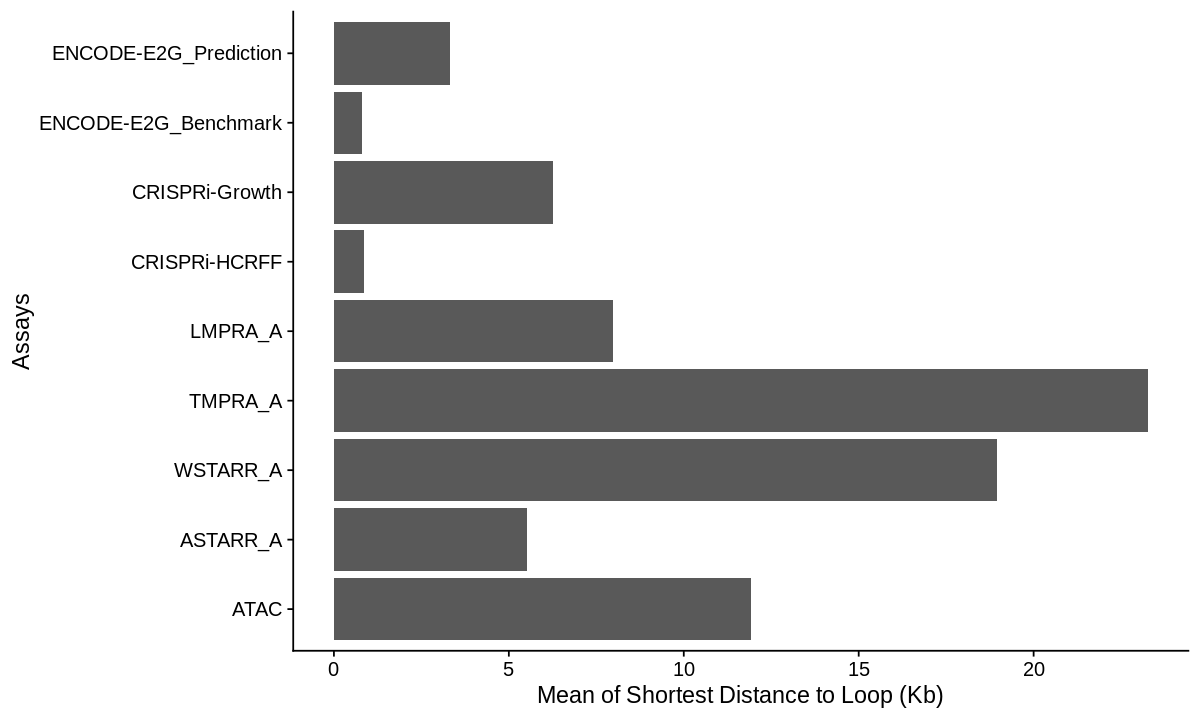

In [93]:
dat = dat_peak_dist2Loop
vec = c(
    "ATAC", 
    "ASTARR_A",
    "WSTARR_A",
    "TMPRA_A",
    "LMPRA_A",
    "CRISPRi-HCRFF",
    "CRISPRi-Growth",
    "ENCODE-E2G_Benchmark",
    "ENCODE-E2G_Prediction"
)
dat = dat %>% 
    dplyr::mutate( Assay = factor(Assay, levels=vec)) %>%
    dplyr::arrange(Assay) #%>%
    #dplyr::mutate( Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x=Q2, y=Assay)) + 
    geom_col() + 
    labs(x="Mean of Shortest Distance to Loop (Kb)", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

In [94]:
fname = "figure_enhancer_loop_distance.pdf"
save_plot(fname, gpt)